In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
%matplotlib inline

In [2]:
df = pd.read_csv('Fever.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [3]:
df.shape

(36, 4)

In [4]:
df.info()
df.A = pd.Categorical(df.A)
df.B = pd.Categorical(df.B)
df.Volunteer = pd.Categorical(df.Volunteer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relief,36.0,7.183333,3.27209,2.3,4.675,6.0,9.325,13.5


In [6]:
df.dtypes

A            category
B            category
Volunteer    category
Relief        float64
dtype: object

In [7]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [8]:
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [9]:
arr = np.arange(1,37)
arr = pd.DataFrame(arr)

# Checking for normality of the data for ingredient A

In [10]:
df_A = df.drop(['B','Volunteer'],axis=1)
df_A

,A,Relief
0,1,2.4
1,1,2.7
2,1,2.3
3,1,2.5
4,1,4.6
5,1,4.2
6,1,4.9
7,1,4.7
8,1,4.8
9,1,4.5


In [11]:
df_new = pd.melt(df_A, id_vars = 'A')
df_new

,A,variable,value
0,1,Relief,2.4
1,1,Relief,2.7
2,1,Relief,2.3
3,1,Relief,2.5
4,1,Relief,4.6
5,1,Relief,4.2
6,1,Relief,4.9
7,1,Relief,4.7
8,1,Relief,4.8
9,1,Relief,4.5


In [12]:
df_new.insert(1,'index',arr)
df_new

,A,index,variable,value
0,1,1,Relief,2.4
1,1,2,Relief,2.7
2,1,3,Relief,2.3
3,1,4,Relief,2.5
4,1,5,Relief,4.6
5,1,6,Relief,4.2
6,1,7,Relief,4.9
7,1,8,Relief,4.7
8,1,9,Relief,4.8
9,1,10,Relief,4.5


In [13]:
l1 = [df_new.A == 1,'index']
l1

[0      True
 1      True
 2      True
 3      True
 4      True
 5      True
 6      True
 7      True
 8      True
 9      True
 10     True
 11     True
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 Name: A, dtype: bool, 'index']

In [14]:
df_new.loc[df_new.A==2,'index'] = df_new.loc[df_new.A==2]['index']-12
df_new.loc[df_new.A==3,'index'] = df_new.loc[df_new.A==3]['index']-24

In [15]:
df_new

,A,index,variable,value
0,1,1,Relief,2.4
1,1,2,Relief,2.7
2,1,3,Relief,2.3
3,1,4,Relief,2.5
4,1,5,Relief,4.6
5,1,6,Relief,4.2
6,1,7,Relief,4.9
7,1,8,Relief,4.7
8,1,9,Relief,4.8
9,1,10,Relief,4.5


In [16]:
df_new = df_new.pivot(index = 'index',columns='A',values='value')

In [17]:
df_new

A,1,2,3
index,,,
1,2.4,5.8,6.1
2,2.7,5.2,5.7
3,2.3,5.5,5.9
4,2.5,5.3,6.2
5,4.6,8.9,9.9
6,4.2,9.1,10.5
7,4.9,8.7,10.6
8,4.7,9.0,10.1
9,4.8,9.1,13.5


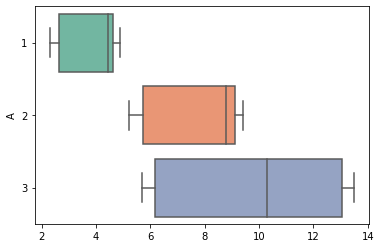

In [18]:
sns.boxplot(data=df_new, orient='h', palette='Set2')

No outliers

In [19]:
df_new.mean()

A
1    3.883333
2    7.833333
3    9.833333
dtype: float64

In [20]:
df_new.var()

A
1    1.121515
2    3.158788
3    9.784242
dtype: float64

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([2.3, 2.4, 2.5, 2.7, 4.2, 4.4, 4.5, 4.6, 4.6, 4.7, 4.8, 4.9])),
 (1.018247021836594, 3.8833333333333333, 0.8914671591169443))

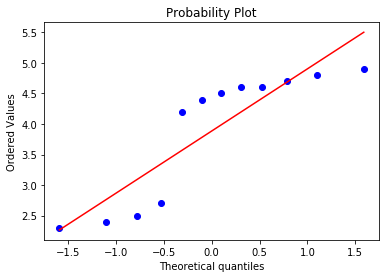

In [21]:
# QQ plots to check for normality
stats.probplot(df_new[1], dist="norm", plot=plt)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([5.2, 5.3, 5.5, 5.8, 8.7, 8.7, 8.9, 9. , 9.1, 9.1, 9.3, 9.4])),
 (1.6650292054789213, 7.833333333333332, 0.8685931440655739))

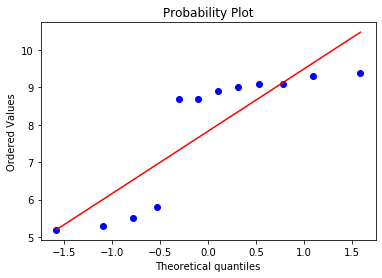

In [22]:
stats.probplot(df_new[2], dist="norm", plot=plt)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([ 5.7,  5.9,  6.1,  6.2,  9.9, 10.1, 10.5, 10.6, 13. , 13.2, 13.3,
         13.5])),
 (3.165821238897123, 9.833333333333334, 0.9383774415729699))

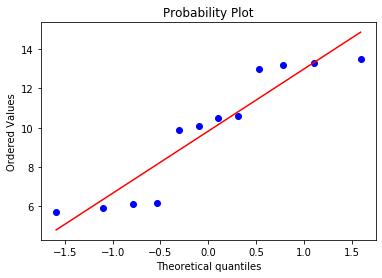

In [23]:
stats.probplot(df_new[3], dist="norm", plot=plt)

In [24]:
# Shapiro test
# Ho: Normal
# H1:- Not Normal
stats.shapiro(df_new[1])#0.05

(0.7686298489570618, 0.004211849067360163)

In [25]:
# Shapiro test
# Ho: Normal
# H1:- Not Normal
stats.shapiro(df_new[2])#0.05

(0.7287067770957947, 0.0016160557279363275)

In [26]:
# Shapiro test
# Ho: Normal
# H1:- Not Normal
stats.shapiro(df_new[3])#0.05

(0.8479959964752197, 0.034682635217905045)

The data above doesnot look to be normal

In [27]:
# testing for homogenity

# Ho:- Variance is Homogenous amoung groups
# H1:- Not homogenous
stats.levene(df_new[1],df_new[2],df_new[3])#alpha = 0.05

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

# Checking for the normality of the Data for the ingredient B

In [28]:
df_B = df.drop(['A','Volunteer'],axis=1)
df_B

,B,Relief
0,1,2.4
1,1,2.7
2,1,2.3
3,1,2.5
4,2,4.6
5,2,4.2
6,2,4.9
7,2,4.7
8,3,4.8
9,3,4.5


In [29]:
df_new_B = pd.melt(df_B, id_vars='B')
df_new_B

,B,variable,value
0,1,Relief,2.4
1,1,Relief,2.7
2,1,Relief,2.3
3,1,Relief,2.5
4,2,Relief,4.6
5,2,Relief,4.2
6,2,Relief,4.9
7,2,Relief,4.7
8,3,Relief,4.8
9,3,Relief,4.5


In [30]:
df_new_B.sort_values('B', axis=0, ascending=True, inplace = True)
df_new_B

,B,variable,value
0,1,Relief,2.4
15,1,Relief,5.3
14,1,Relief,5.5
13,1,Relief,5.2
12,1,Relief,5.8
24,1,Relief,6.1
25,1,Relief,5.7
26,1,Relief,5.9
27,1,Relief,6.2
3,1,Relief,2.5


In [31]:
df_new_B = df_new_B.reset_index()
df_new_B

,index,B,variable,value
0,0,1,Relief,2.4
1,15,1,Relief,5.3
2,14,1,Relief,5.5
3,13,1,Relief,5.2
4,12,1,Relief,5.8
5,24,1,Relief,6.1
6,25,1,Relief,5.7
7,26,1,Relief,5.9
8,27,1,Relief,6.2
9,3,1,Relief,2.5


In [32]:
df_new_B = df_new_B.drop(['index'],axis=1)

In [33]:
df_new_B

,B,variable,value
0,1,Relief,2.4
1,1,Relief,5.3
2,1,Relief,5.5
3,1,Relief,5.2
4,1,Relief,5.8
5,1,Relief,6.1
6,1,Relief,5.7
7,1,Relief,5.9
8,1,Relief,6.2
9,1,Relief,2.5


In [34]:
df_new_B.insert(1,'index',arr)
df_new_B

,B,index,variable,value
0,1,1,Relief,2.4
1,1,2,Relief,5.3
2,1,3,Relief,5.5
3,1,4,Relief,5.2
4,1,5,Relief,5.8
5,1,6,Relief,6.1
6,1,7,Relief,5.7
7,1,8,Relief,5.9
8,1,9,Relief,6.2
9,1,10,Relief,2.5


In [35]:
df_new_B.loc[df_new_B.B==2,'index'] = df_new_B.loc[df_new_B.B==2]['index']-12
df_new_B.loc[df_new_B.B==3,'index'] = df_new_B.loc[df_new_B.B==3]['index']-24
df_new_B

,B,index,variable,value
0,1,1,Relief,2.4
1,1,2,Relief,5.3
2,1,3,Relief,5.5
3,1,4,Relief,5.2
4,1,5,Relief,5.8
5,1,6,Relief,6.1
6,1,7,Relief,5.7
7,1,8,Relief,5.9
8,1,9,Relief,6.2
9,1,10,Relief,2.5


In [36]:
df_new_B = df_new_B.pivot(index = 'index',columns='B',values='value')

In [37]:
df_new_B

B,1,2,3
index,,,
1,2.4,9.9,13.0
2,5.3,10.5,13.5
3,5.5,10.6,13.3
4,5.2,10.1,4.8
5,5.8,9.0,4.4
6,6.1,8.7,4.6
7,5.7,9.1,9.4
8,5.9,8.9,8.7
9,6.2,4.6,9.3


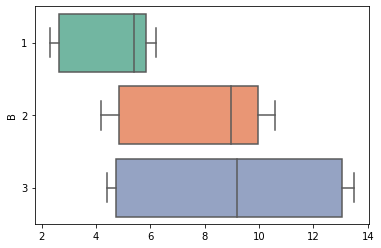

In [38]:
sns.boxplot(data=df_new_B, orient='h', palette='Set2')

In [54]:
df_new_B.mean()

B
1    4.633333
2    7.933333
3    8.983333
dtype: float64

#### No outliers present

#### QQ plot for normality test

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([2.3, 2.4, 2.5, 2.7, 5.2, 5.3, 5.5, 5.7, 5.8, 5.9, 6.1, 6.2])),
 (1.55856042124206, 4.633333333333334, 0.8907902989859319))

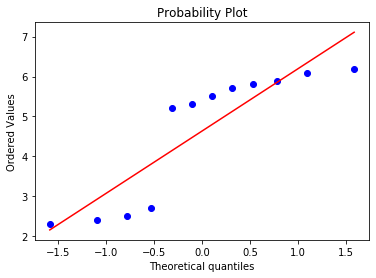

In [55]:
stats.probplot(df_new_B[1], dist='norm', plot=plt)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([ 4.2,  4.6,  4.7,  4.9,  8.7,  8.9,  9. ,  9.1,  9.9, 10.1, 10.5,
         10.6])),
 (2.5017509304486993, 7.933333333333334, 0.9130757184800945))

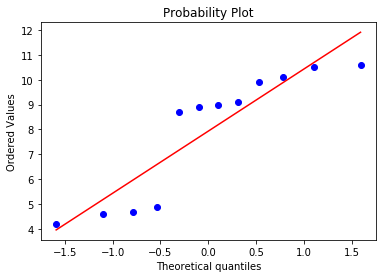

In [40]:
stats.probplot(df_new_B[2], dist='norm', plot = plt)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([ 4.4,  4.5,  4.6,  4.8,  8.7,  9.1,  9.3,  9.4, 13. , 13.2, 13.3,
         13.5])),
 (3.7473119986803125, 8.983333333333333, 0.9373160405587787))

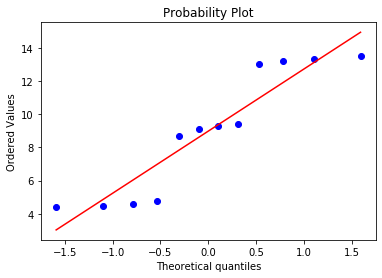

In [41]:
stats.probplot(df_new_B[3], dist='norm', plot=plt)

#### Shapiro Test for Normality

In [42]:
# Shapiro test
# Ho: Normal
# H1:- Not Normal
stats.shapiro(df_new_B[1])#0.05

(0.765633761882782, 0.00391089404001832)

In [43]:
stats.shapiro(df_new_B[2])#0.05

(0.8065383434295654, 0.01112875435501337)

In [44]:
stats.shapiro(df_new_B[3])#0.05

(0.8446834087371826, 0.031581729650497437)

In [45]:
# testing for homogenity
# Ho:- Variance is Homogenous amoung groups
# H1:- Not homogenous
stats.levene(df_new_B[1],df_new_B[2],df_new_B[3])#alpha = 0.05

LeveneResult(statistic=2.94135651720882, pvalue=0.06675699295483067)

# ANOVA 

In [46]:
from statsmodels.formula.api import ols # for n way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm # for n way anova 

### One Way ANOVA:

#### 1. Relief depends on various levels of the Ingredient A
    
    Relief ~ C(A)
    
        Null hypothesis:  there is no effect of the various levels of the ingredient A on the Relief
                         Ho: u (level_1_A) = u (level_2_A) = u (level_3_A)
                         
    Alternate hypothesis Ha: there is an effect of the varuous levels of the ingredient A on the Relief
                         Ha: Ho doesnot hold correct

#### 2. Relief depends on various levels of the Ingredient B
   
    Relief ~ C(B)
    
        Null hypothesis:  there is no effect of the various levels of the ingredient B on the Relief
                         Ho: u (level_1_B) = u (level_2_B) = u (level_3_B)
                         
    Alternate hypothesis Ha: there is an effect of the varuous levels of the ingredient B on the Relief
                         Ha: Ho doesnot hold correct

In [47]:
formula = 'Relief ~ C(A)'
modelA = ols (formula, df).fit()
aov_table = anova_lm(modelA)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [48]:
formula = 'Relief ~ C(B)'
modelB = ols (formula, df).fit()
aov_table = anova_lm(modelB)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


### TWO  WAY ANOVA

#### Relief ~ C(B)

    Null hypothesis:  there is no effect of the various levels of the ingredient B on the Relief
                     Ho: u (level_1_B) = u (level_2_B) = u (level_3_B)
                     
    Alternate hypothesis: there is an effect of the varuous levels of the ingredient B on the Relief
                     Ha: Ho doesnot hold correct

In [49]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
modelT = ols (formula, df).fit()
aov_table = anova_lm(modelT)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


### Interaction Plot

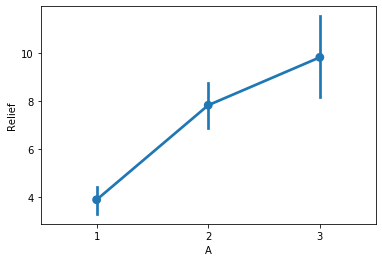

In [50]:
sns.pointplot(x='A', y='Relief', data=df)

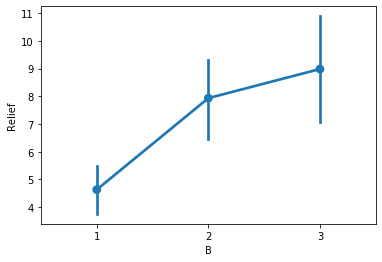

In [51]:
sns.pointplot(x='B', y='Relief', data=df)

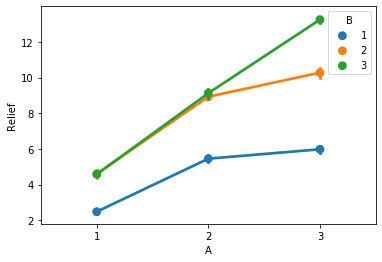

In [52]:
sns.pointplot(x='A', y='Relief', data=df, hue='B')

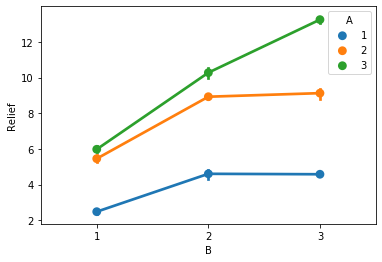

In [53]:
sns.pointplot(x='B', y='Relief', data=df, hue='A')